In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
car = pd.read_csv("./car+evaluation/car.data", header=None)
car.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']
car

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [38]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   object
 1   Maint       1728 non-null   object
 2   Doors       1728 non-null   object
 3   Persons     1728 non-null   object
 4   LugBoot     1728 non-null   object
 5   Safety      1728 non-null   object
 6   Evaluation  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [39]:
#To find the number of values in each feature
for col in car.columns:
    print(car[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: Buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: Maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: Doors, dtype: int64
2       576
4       576
more    576
Name: Persons, dtype: int64
small    576
med      576
big      576
Name: LugBoot, dtype: int64
low     576
med     576
high    576
Name: Safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Evaluation, dtype: int64


In [40]:
car['Evaluation'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Evaluation, dtype: int64

In [41]:
#Checking if the data contains null or na values
print(car.isna().values.any())
print(car.isnull().values.any())

False
False


In [42]:
#Feature Selection
X = car.drop(['Evaluation'], axis=1)
y = car['Evaluation']

In [43]:
#Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [44]:
y_train.shape, y_test.shape

((1209,), (519,))

In [50]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train['Buying'] = encoder.fit_transform(X_train['Buying'])
X_test['Buying'] = encoder.transform(X_test['Buying'])
X_train['Maint'] = encoder.fit_transform(X_train['Maint'])
X_test['Maint'] = encoder.transform(X_test['Maint'])
X_train['Doors'] = encoder.fit_transform(X_train['Doors'])
X_test['Doors'] = encoder.transform(X_test['Doors'])
X_train['Persons'] = encoder.fit_transform(X_train['Persons'])
X_test['Persons'] = encoder.transform(X_test['Persons'])
X_train['LugBoot'] = encoder.fit_transform(X_train['LugBoot'])
X_test['LugBoot'] = encoder.transform(X_test['LugBoot'])
X_train['Safety'] = encoder.fit_transform(X_train['Safety'])
X_test['Safety'] = encoder.transform(X_test['Safety'])

X_train['Buying'].value_counts()

2    308
3    305
0    299
1    297
Name: Buying, dtype: int64

Decision Tree with Gini Index

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
ID3 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
ID3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [53]:
#Predicting the Test Dataset
y_pred_ID3 = ID3.predict(X_test)
y_pred_ID3[:5]

array(['unacc', 'acc', 'unacc', 'acc', 'unacc'], dtype=object)

In [54]:
#Predicting the Train Dataset
y_pred_train_ID3 = ID3.predict(X_train)
y_pred_train_ID3

array(['acc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'], dtype=object)

In [56]:
#checking Accuracy Score
from sklearn.metrics import accuracy_score
print("Model Accuracy Score with Criterion Entropy for Test Data {0: 0.4f}".format(accuracy_score(y_pred_ID3, y_test)))
print("Model Accuracy Score with Criterion Entropy for Train Data {0: 0.4f}".format(accuracy_score(y_pred_train_ID3, y_train)))

Model Accuracy Score with Criterion gini index for Test Data  0.8304
Model Accuracy Score with Criterion gini index for Train Data  0.8230


In [57]:
#Finding the Important variables
feature_importances = ID3.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

Buying: 0.08470643219544492
Maint: 0.06536399945923003
Doors: 0.0
Persons: 0.3261790586559835
LugBoot: 0.05484354633573259
Safety: 0.4689069633536089


[Text(0.4583333333333333, 0.9, 'Persons <= 0.5\nentropy = 1.192\nsamples = 1209\nvalue = [266, 50, 852, 41]\nclass = good'),
 Text(0.375, 0.7, 'entropy = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]\nclass = good'),
 Text(0.5416666666666666, 0.7, 'Safety <= 0.5\nentropy = 1.458\nsamples = 816\nvalue = [266, 50, 459, 41]\nclass = good'),
 Text(0.3333333333333333, 0.5, 'Maint <= 2.5\nentropy = 1.667\nsamples = 273\nvalue = [147, 21, 64, 41]\nclass = unacc'),
 Text(0.16666666666666666, 0.3, 'Buying <= 0.5\nentropy = 1.653\nsamples = 202\nvalue = [114, 21, 26, 41]\nclass = unacc'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.305\nsamples = 55\nvalue = [52, 0, 3, 0]\nclass = unacc'),
 Text(0.25, 0.1, 'entropy = 1.859\nsamples = 147\nvalue = [62, 21, 23, 41]\nclass = unacc'),
 Text(0.5, 0.3, 'Buying <= 2.5\nentropy = 0.996\nsamples = 71\nvalue = [33, 0, 38, 0]\nclass = good'),
 Text(0.4166666666666667, 0.1, 'entropy = 0.947\nsamples = 52\nvalue = [33, 0, 19, 0]\nclass = unacc'),
 Text(0.58333

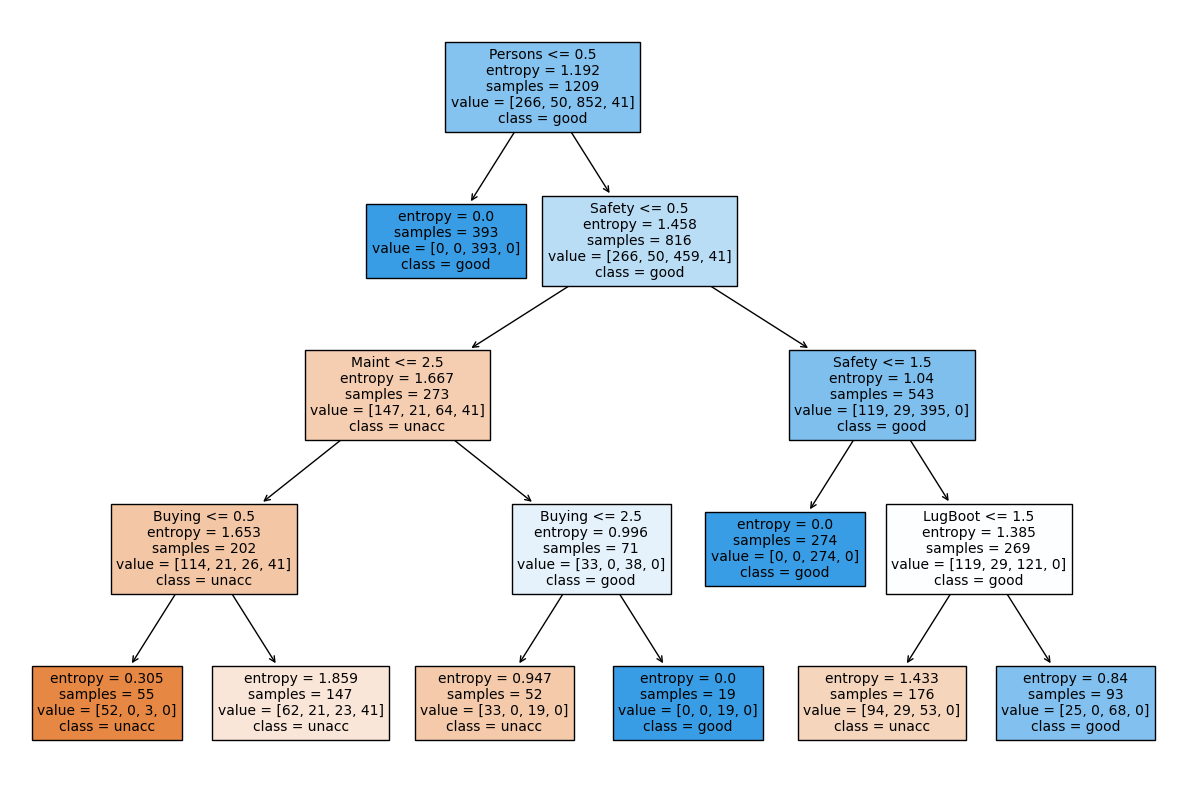

In [60]:
#Plotting the Decision Tree
plt.figure("Decision Tree", figsize=(15, 10))

from sklearn import tree
tree.plot_tree(ID3, fontsize=10, filled=True, feature_names=["Buying", "Maint", "Doors", "Persons", "LugBoot", "Safety"], class_names=["unacc", "acc", "good", "vgood"])
#plt.tight_layout()
#plt.show()

#The Gini Index is the metrics for showing impurity